## Classification - Acquistion Exercises

### Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.preprocessing
import sklearn.model_selection

import env
import acquire
import prepare

In [ ]:
# Load the iris data from seaborn
# print the first 3 rows

df_iris = sns.load_dataset('iris')
df_iris.head(3)

In [ ]:
# print the number of rows and columns (shape)

df_iris.shape

In [ ]:
# print the column names

df_iris.columns.tolist()

In [ ]:
# another way

list(df_iris.columns.values)

In [ ]:
# print the data type of each column

df_iris.info()

In [ ]:
# print the summary statistics for each of the numeric variables.
# Would you recommend rescaling the data based on these statistics?

df_iris.describe()

In [ ]:
# I wouldn't recommend rescaling the data

### Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
custdetails = pd.read_excel('Spreadsheets_Exercises_Solutions.xlsx', sheet_name ='Table1_CustDetails')

In [ ]:
custdetails.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = custdetails.head(100)

In [ ]:
df_excel_sample

In [ ]:
# print the number of rows of your original dataframe

len(custdetails.index)

print(f'My original DataFrame has {custdetails.shape[0]} rows.')

In [ ]:
# or

custdetails.shape

In [ ]:
# print the first 5 column names

custdetails.columns[:5]

In [ ]:
# print the column names that have a data type of object

custdetails.info()

In [ ]:
custdetails.select_dtypes(include='object')

In [ ]:
# as a loop

for col in custdetails:
    if custdetails[col].dtype == 'O':
        print(col)

In [ ]:
# Leave the loops in the 80s and do it with a list comprehension!

[col for col in custdetails if custdetails[col].dtype == 'O']

In [ ]:
# compute the range for each of the numeric variables

monthly_charges = custdetails['monthly_charges']
monthly_charges_range = monthly_charges.max() - monthly_charges.min()

In [ ]:
monthly_charges_range

In [ ]:
total_charges = custdetails['total_charges']
total_charges_range = total_charges.max() - total_charges.min()

In [ ]:
total_charges_range

In [ ]:
# another way to do it

numeric_df = custdetails.select_dtypes(['int64', 'float64'])
print(f'The range of each numeric columns is:')
print('-------------------------------------')
print(round(numeric_df.max() - numeric_df.min(),2))

In [ ]:
custdetails.describe().transpose()

### Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
# Read the data from this google sheet into a dataframe, df_google

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

# print the first 3 rows

df_google.head(3)

In [ ]:
# print the number of rows and columns

df_google.columns.tolist()

In [ ]:
df_google.index.values

In [ ]:
# print the data type of each column

df_google.info()

In [ ]:
# print the summary statistics for each of the numeric variables

df_google.describe()

In [ ]:
# print the unique values for each of your categorical variables

df_google['Name'].unique()

In [ ]:
df_google['Sex'].unique()

In [ ]:
df_google['Ticket'].unique()

In [ ]:
df_google['Cabin'].unique()

In [ ]:
# another way
print(df_google.Name.unique())
print('----------------------------')
print(df_google.Name.nunique())

In [ ]:
df_google['Embarked'].unique()

In [ ]:
def cat_uniques(df):
    for col in df:
        if df[col].dtype == 'O':
            print(col)
            print('-------------')
            print(df[col].value_counts(dropna=False))
            print('-------------')

In [ ]:
cat_uniques(df_google)

### In a new python module, acquire.py:

#### get_titanic_data: returns the titanic data from the codeup data science database as a pandas data frame.

#### get_iris_data: returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids.

In [ ]:
titanic = acquire.get_titanic_data()

In [ ]:
titanic.head()

In [ ]:
iris_db = acquire.get_iris_data()

In [ ]:
iris_db.head()

## Classification - Prep Exercises

### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

#### Iris Data

- Use the function defined in acquire.py to load the iris data.
- Drop the species_id and measurement_id columns.
- Rename the species_name column to just species.
- Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?
- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
df = acquire.get_iris_data()

In [ ]:
df.head()

In [ ]:
# Drop the species_id and measurement_id columns.

df = df.drop(columns=['species_id', 'measurement_id'])

In [ ]:
df.head()

In [ ]:
# Rename the species_name column to just species.

df.rename(columns={'species_name':'species'}, inplace=True)

In [ ]:
df.head()

In [ ]:
# Encode the species name using a sklearn label encoder.
# Research the inverse_transform method of the label encoder. How might this be useful?

# inverse_transform(self, y) Transform labels back to original encoding.

# Make the thing

label_encoder = sklearn.preprocessing.LabelEncoder()

# Fit the thing

label_encoder.fit(df[['species']])

# Transform the thing

m = label_encoder.transform(df[['species']])

In [ ]:
label_encoder.classes_

In [ ]:
m.shape

In [ ]:
m = pd.DataFrame(m)

In [ ]:
m

In [ ]:
df.head()

In [ ]:
df = pd.concat([df, pd.DataFrame(m)], axis=1)

In [ ]:
df.rename(columns={0:'species_encoding'}, inplace=True)

In [ ]:
df.sample(20)

In [ ]:
# Create a function named prep_iris that accepts the untransformed iris data, and
# returns the data with the transformations above applied.

def encode_species(train, test):
    encoder = sklearn.preprocessing.OneHotEncoder()
    encoder.fit(train[['species']])
    
    cols = ['species_' + c for c in encoder.categories_[0]]
    
    m = encoder.transform(train[['species']]).todense()

    train = pd.concat([train,pd.DataFrame(m, columns=cols, index=train.index)], axis=1)
    
    m = encoder.transform(test[['species']]).todense()
    
    test = pd.concat([test,pd.DataFrame(m, columns=cols, index=test.index)], axis=1)
    
    return train, test
    

def prep_iris(df):
    df = df.drop(columns=['species_id'])
    df = df.rename(columns={'species_name':'species'})
    train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=19)
    train, test = encode_species(train, test)
    return train, test

In [ ]:
df = acquire.get_iris_data()

In [ ]:
df.head()

In [ ]:
train, test = prep_iris(df)

In [ ]:
train.head()

In [ ]:
test.shape

### Titanic Data

- Use the function you defined in acquire.py to load the titanic data set.
- Handle the missing values in the embark_town and embarked columns.
- Remove the deck column.
- Use a label encoder to transform the embarked column.
- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.m

In [ ]:
df = acquire.get_titanic_data()

In [ ]:
df.head()

In [ ]:
df.embark_town = df.embark_town.fillna(df.embark_town.value_counts().head(1).index[0])

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=19)

In [ ]:
train.head()

In [ ]:
# Handle the missing values in the embark_town and embarked columns.
train.embark_town.value_counts()

In [ ]:
train.embark_town = train.embark_town.fillna('Southampton')
test.embark_town = test.embark_town.fillna('Southampton')

In [ ]:
train.isnull().sum()

In [ ]:
pd.crosstab(train.embarked, train.embark_town)

In [ ]:
train.embark = train.embarked.fillna('Southampton')
test.embark = test.embarked.fillna('Southampton')

In [ ]:
test.isna().sum()

In [ ]:
test.embark_town.value_counts()

In [ ]:
# Remove the deck column.

train = train.drop(columns='deck')

In [ ]:
test = test.drop(columns='deck')

In [ ]:
train.head()

In [ ]:
# Use a label encoder to transform the embarked column.

train['embarked'] = train['embarked'].astype(str)
test['embarked'] = test['embarked'].astype(str)
# make the thing
encoder = sklearn.preprocessing.OneHotEncoder()

# fit the thing
encoder.fit(train[['embarked']])

cols = ['embarked_' + c for c in encoder.categories_[0]]

#transform the thing
# .todense to convert from sparse matrix to plain old 2d numpy
m = encoder.transform(train[['embarked']]).todense()

train = pd.concat([
    train,
    pd.DataFrame(m, columns=cols, index=train.index)
], axis=1)

m = encoder.transform(test[['embarked']]).todense()

test = pd.concat([
    test,
    pd.DataFrame(m, columns=cols, index=test.index)
], axis=1)

In [ ]:
train.head()

In [ ]:
def drop_columns(df):
    return df.drop(columns="deck")

def fill_na(df):
    df.embark_town = df.embark_town.fillna('Southampton')
    df.embarked = df.embarked.fillna('S')
    return df
    
def encode_titanic(train, test):
    encoder = sklearn.preprocessing.OneHotEncoder()
    encoder.fit(train[["embarked"]])

    m = encoder.transform(train[["embarked"]]).todense()

    train = pd.concat([train, pd.DataFrame(m, columns=encoder.categories_[0], index=train.index)], axis=1)

    m = encoder.transform(test[["embarked"]]).todense()

    test = pd.concat([train, pd.DataFrame(m, columns=encoder.categories_[0], index=test.index)], axis=1)

    return train, test

def impute_titanic(train, test):
    imputer = sklearn.impute.SimpleImputer(strategy='mean')
    imputer.fit(train[['age']])
    train.age = imputer.transform(train[['age']])
    test.age = imputer.transform(test[['age']])

    return train, test

def scale_titanic(train, test):
    train_scaled = train[['age', 'fare']]
    test_scaled = test[['age', 'fare']]
    scaler, train_scaled, test_scaled = split_scale.min_max_scaler(train_scaled, test_scaled)
    return scaler, train_scaled, test_scaled

In [ ]:
df = drop_columns(df)

In [ ]:
df = fill_na(df)

In [ ]:
train, test = sklearn.model_selection.train_test_split(df, random_state=19, train_size = .8)

In [ ]:
train, test = encode_titanic(train, test)

In [ ]:
scaler, train, test = prepare.prep_titanic(df)

In [ ]:
train.head()

### Classification - Exploration Exercises

- Use the iris dataset.

- Split data into train (70%) & test (30%) samples.

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Create 4 subplots (2 rows x 2 columns) of scatterplots
    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length

- Make your figure size 14 x 8. What are your takeaways?

- Create a heatmap of each variable layering correlation coefficient on top.

- Create a scatter matrix visualizing the interaction of each variable

- Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

    - must include null hypothesis, alternative hypothesis, t-test, results, summary
    - $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
    - $H_a$: the difference in sepal length between virginica and versicolor is substantial.
    - We will test if the sepal length of virginica is significantly different than that of the versicolor.
    - If there is difference, then variable sepal_length is a good choice to keep as a feature.
    - We can use a t-test here, as sepal_length is somewhat normally distributed.

In [7]:
df = acquire.get_iris_data()
encoder, train, test = prepare.prep_iris(df)
train.head()

/Users/chasethompson/codeup-data-science/ds-methodologies-exercises/classification/prepare.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['species'] = le.fit_transform(train.species)
/Users/chasethompson/codeup-data-science/ds-methodologies-exercises/classification/prepare.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['species'] = le.transform(test.species)


,species,sepal_length,sepal_width,petal_length,petal_width
30,0,4.8,3.1,1.6,0.2
36,0,5.5,3.5,1.3,0.2
29,0,4.7,3.2,1.6,0.2
55,1,5.7,2.8,4.5,1.3
118,2,7.7,2.6,6.9,2.3


In [8]:
# Create a swarmplot using a melted dataframe of all your numeric variables.
# The x-axis is the variable name, the y-axis is the measure.
# Add another dimension using color to represent species. Document takeaways from this visualization.
variables = train.select_dtypes(include=['float64'])
variables

,sepal_length,sepal_width,petal_length,petal_width
30,4.8,3.1,1.6,0.2
36,5.5,3.5,1.3,0.2
29,4.7,3.2,1.6,0.2
55,5.7,2.8,4.5,1.3
118,7.7,2.6,6.9,2.3
27,5.2,3.5,1.5,0.2
119,6.0,2.2,5.0,1.5
24,4.8,3.4,1.9,0.2
113,5.7,2.5,5.0,2.0
128,6.4,2.8,5.6,2.1


In [9]:
melt = pd.melt(train, 'species', var_name='measurement')
melt

,species,measurement,value
0,0,sepal_length,4.8
1,0,sepal_length,5.5
2,0,sepal_length,4.7
3,1,sepal_length,5.7
4,2,sepal_length,7.7
...,...,...,...
443,0,petal_width,0.2
444,0,petal_width,0.2
445,2,petal_width,2.2
446,0,petal_width,0.2


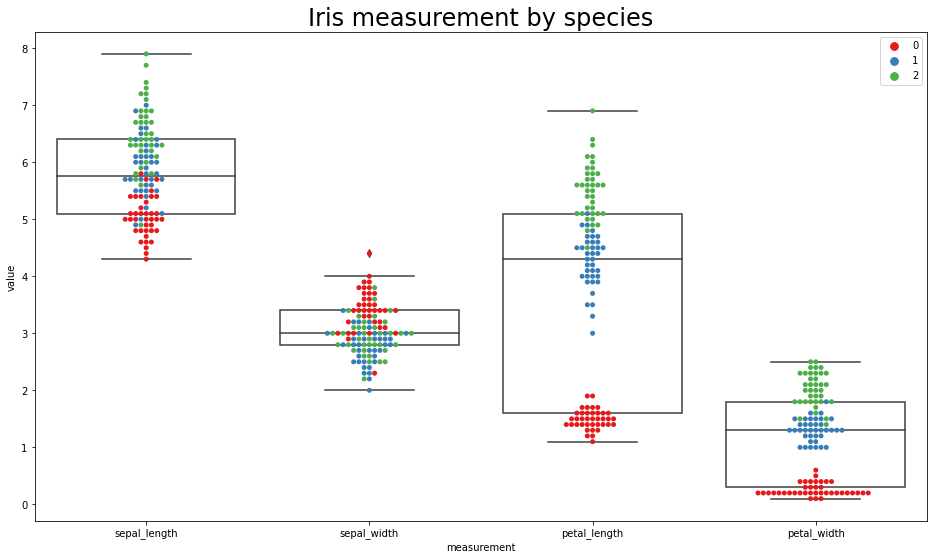

In [16]:
plt.figure(figsize=(16, 9))

sns.swarmplot(x="measurement", y="value", data=melt, hue="species", palette="Set1")
ax = sns.boxplot(x="measurement", y="value", data=melt,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})
plt.title('Iris measurement by species', fontsize=24)
plt.legend(loc=1)

Takeways:
    
- Sepal width seems more tightly correlated than sepal length
- Petal length for Setosa is very different from others
- Petal width is also more closely related, but Setosa still varies more than the others
- Versicolor and Virginica are closely related across the board, though are very much entangled in the sepal width
- Petal length is the best predictor looking at this chart

Text(0, 0.5, 'petal_width')

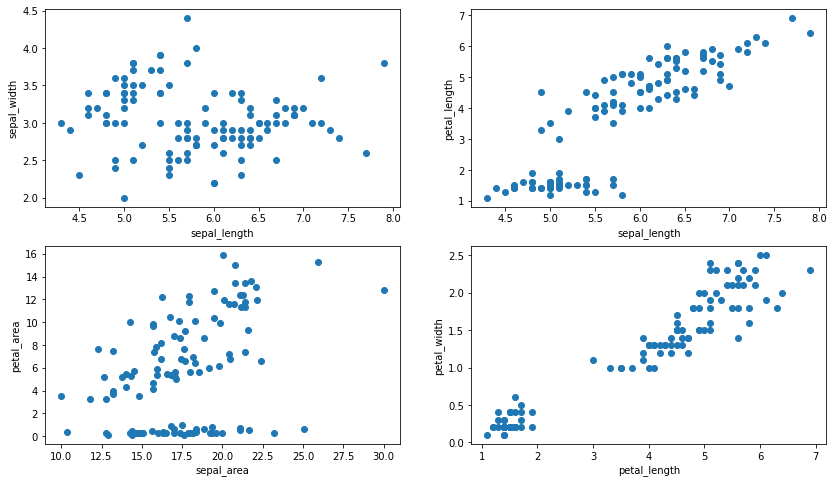

In [17]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Create 4 subplots (2 rows x 2 columns) of scatterplots
# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

plt.figure(figsize=(14,8))

plt.subplot(2, 2, 1)
plt.scatter(train.sepal_length, train.sepal_width)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.subplot(2, 2, 2)
plt.scatter(train.sepal_length,train.petal_length)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

plt.subplot(2, 2, 3)
plt.scatter(train.sepal_area,train.petal_area)
plt.xlabel('sepal_area')
plt.ylabel('petal_area')

plt.subplot(2, 2, 4)
plt.scatter(train.petal_length, train.petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Takeaway: Without species hue seperation it's hard to tell what going on really. There are definitely some patterns, but not much can be done with them.

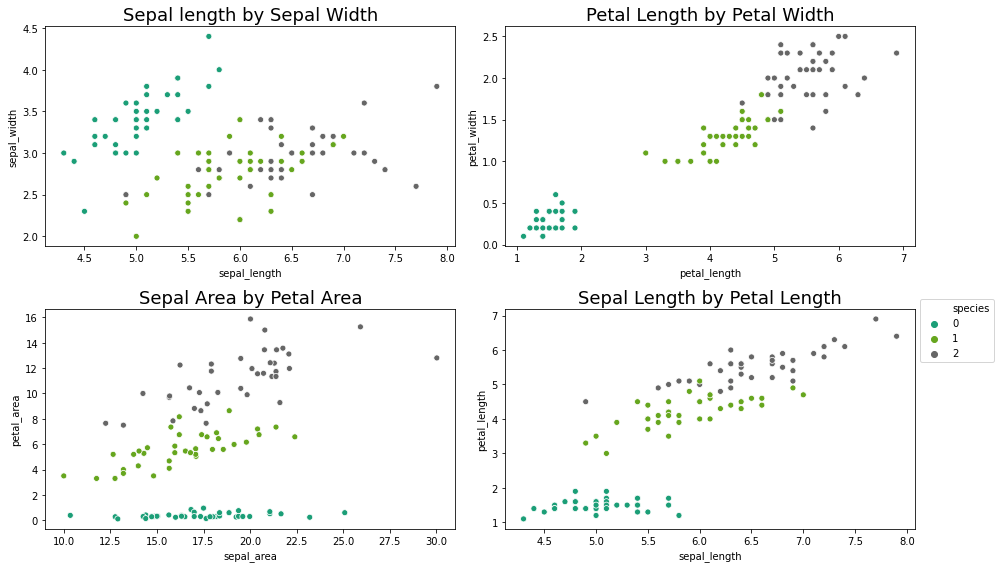

In [57]:
figure, axes = plt.subplots(2,2, figsize=(14, 8))

sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", legend=False, palette='Dark2', data=train, ax=axes[0,0])
axes[0,0].set_title("Sepal length by Sepal Width", fontsize=18)
sns.scatterplot(x="petal_length", y="petal_width", hue="species", legend=False, palette='Dark2', data=train, ax=axes[0,1])
axes[0,1].set_title("Petal Length by Petal Width", fontsize=18)
sns.scatterplot(x="sepal_area", y="petal_area", hue="species", legend=False, palette='Dark2', data=train, ax=axes[1,0])
axes[1,0].set_title("Sepal Area by Petal Area", fontsize=18)
sns.scatterplot(x="sepal_length", y="petal_length", data=train, hue="species", palette='Dark2', ax=axes[1,1])
axes[1,1].set_title("Sepal Length by Petal Length", fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, .9), ncol=1)
figure.tight_layout()
plt.show()

That's better.

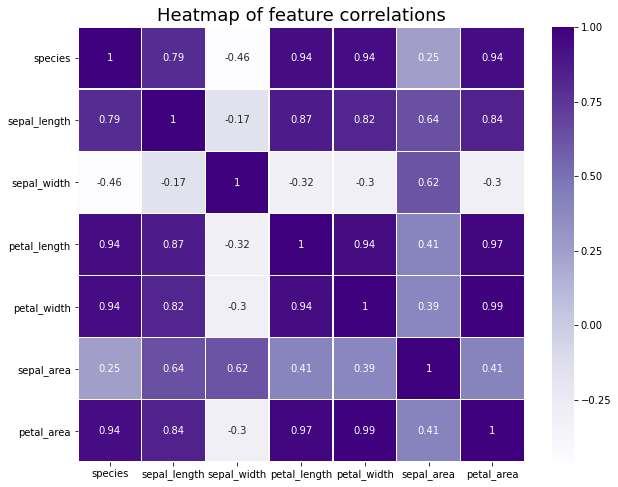

In [64]:
# Create a heatmap of each variable layering correlation coefficient on top.

plt.figure(figsize=(10,8))
plt.title("Heatmap of feature correlations", fontsize=18)
sns.heatmap(train.corr(method='spearman'), annot=True, linewidth=0.4, cmap='Purples')

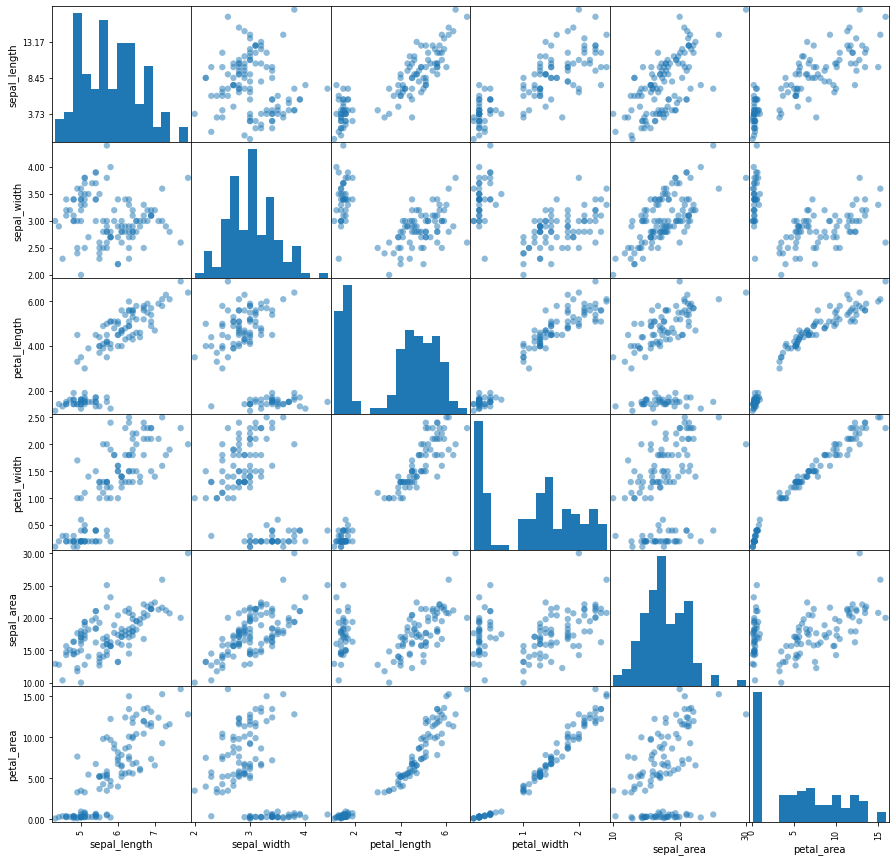

In [65]:
# Create a scatter matrix visualizing the interaction of each variable

from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train[['sepal_length','sepal_width','petal_length', 'petal_width', 'sepal_area', 'petal_area']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(15,15), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

- Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

    - must include null hypothesis, alternative hypothesis, t-test, results, summary
    - $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
    - $H_a$: the difference in sepal length between virginica and versicolor is substantial.
    - We will test if the sepal length of virginica is significantly different than that of the versicolor.
    - If there is difference, then variable sepal_length is a good choice to keep as a feature.
    - We can use a t-test here, as sepal_length is somewhat normally distributed.

### Is the sepal length significantly different in virginica compared to versicolor?

- $H_0$: the difference in sepal length between virginica and versiolor is insignificant

- $H_a$: the difference in sepal length between virginica and versiolor is significant

In [72]:
train["species_name"] = encoder.inverse_transform(train.species)

In [77]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,species_name
30,0,4.8,3.1,1.6,0.2,14.88,0.32,setosa
36,0,5.5,3.5,1.3,0.2,19.25,0.26,setosa
29,0,4.7,3.2,1.6,0.2,15.04,0.32,setosa
55,1,5.7,2.8,4.5,1.3,15.96,5.85,versicolor
118,2,7.7,2.6,6.9,2.3,20.02,15.87,virginica


In [73]:
from scipy import stats

In [80]:
alpha = 0.1

x1 = train[train.species_name == 'virginica'].sepal_length
x2 = train[train.species_name == 'versicolor'].sepal_length

# r, p = stats.ttest_ind(x1, x2)
# r, p

t, p = stats.ttest_ind(x1, x2)
t, p

if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

We reject the null


# If the p-value is less than alpha, we reject the null hypothesis that there's no difference between the two and conclude that a significant difference does exist.